# Nations and Conflict

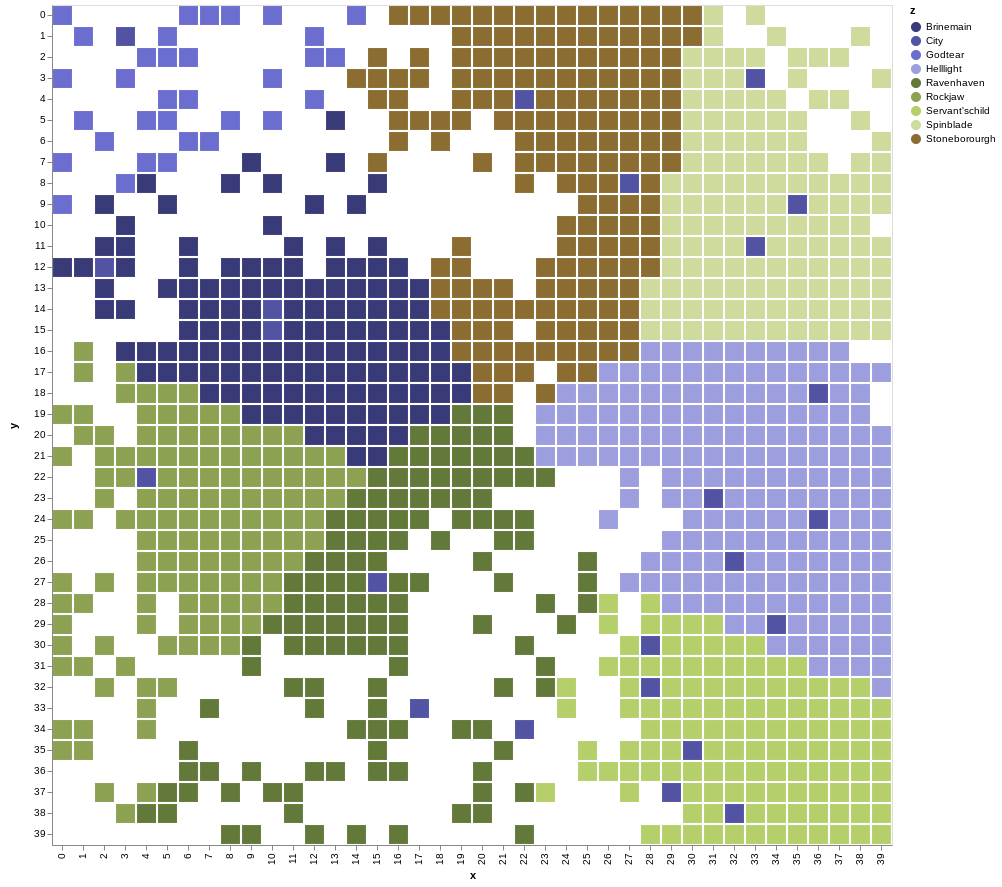

In [1]:
import pandas as pd
import numpy as np
import pickle

import altair as alt


# importing local libraries for drawings (because they clutter)
# in Github, you can search  
#   They should still be available within the git repo but it's pretty much template stuff from altair
import sys
sys.path.append('../')
from lib.builders import towns,nations,people
import lib.drawMaps as draw

with (open('world_2.p', 'rb')) as pickle_file:
    world = pickle.load(pickle_file)
    
draw.drawboarders(world.df_features)

Now that we have `landscape`, `culture`, `nations`, `towns`, and `people` we can start building an interaction between them. 

We can start with a `world` that has `nations` and each `Nation` has `towns`. 

In [2]:
world.towns

[capitol of Helltear: population: 7 location: [31,23] founded 0,
 capitol of Tearcombe: population: 5 location: [28,30] founded 0,
 town of Fallwish: population: 2 location: [15,27] founded 0,
 town of Artcombe: population: 5 location: [28,32] founded 1,
 capitol of Leafhollow: population: 5 location: [22,34] founded 2,
 town of Fenhenge: population: 2 location: [34,29] founded 2,
 capitol of Warchild: population: 3 location: [2,12] founded 2,
 town of King'sspring: population: 5 location: [36,24] founded 3,
 town of Clearmelt: population: 2 location: [10,15] founded 3,
 capitol of Clearhollow: population: 3 location: [35,9] founded 3,
 capitol of Lioncombe: population: 4 location: [3,1] founded 4,
 town of Fairpike: population: 5 location: [30,35] founded 4,
 town of Flamerail: population: 1 location: [36,18] founded 4,
 capitol of Fencatch: population: 2 location: [4,22] founded 5,
 town of Snakerail: population: 1 location: [32,26] founded 5,
 capitol of Malborourgh: population: 3 l

In [3]:
town = world.towns[1]
print(f"{town.name} is loyal to the nation of {town.nation}")
print(f"{town.diplomacy}")

Tearcombe is loyal to the nation of Servant'schild
{'nation': "Servant'schild", 'national fealty': 1}


In [4]:
world.nations

[Nation of Rockjaw,
 Nation of Helllight,
 Nation of Stoneborourgh,
 Nation of Servant'schild,
 Nation of Godtear,
 Nation of Brinemain,
 Nation of Ravenhaven,
 Nation of Spinblade]

In [5]:
example_nation = world.nations[1]
print (example_nation.ruler," has a temperment of ",example_nation.ruler.temperment)
print (example_nation.get_capitol().speaker," has a loyalty of ",example_nation.get_capitol().speaker.loyalty)

Thekrackoch, Ruler of the nation of Helllight, residing in Helltear  has a temperment of  0.40958602046911796
Brockrnan, Speaker of Helltear, residing in Helltear  has a loyalty of  0.5


In [6]:
example_nation.towns

[capitol of Helltear: population: 7 location: [31,23] founded 0,
 town of Fenhenge: population: 2 location: [34,29] founded 2,
 town of King'sspring: population: 5 location: [36,24] founded 3,
 town of Flamerail: population: 1 location: [36,18] founded 4,
 town of Snakerail: population: 1 location: [32,26] founded 5]

In [7]:
def getNation(a):
    return [n for n in world.nations if n.name ==a][0]

def alterFavor(a,o,s):
    """
    a = the target nation (obj). a will not change. O's favor of A will change.
    o = the nation(s) who's favor is change. O's favor of a will change
    (a,[o]) each nation in o's favor of a is changed by s
    (a,o) o's favor of a is changed by s
    ([a],o) o's favor of each nation in a is changed by s
    s = amount of change (int)
    """
    if type(o) == list:
        for i in o:
            i.diplomacy[a.name]['favor'] += s
    elif type(a) == list:
         for i in a:
            o.diplomacy[i.name]['favor'] += s       
    else:
        o.diplomacy[a.name]['favor'] += s
        
test_nation = world.nations[0].name
    
getNation('Clearward').diplomacy

IndexError: list index out of range

In [ ]:
test_nation

In [ ]:
alterFavor(getNation('Godtown'),[getNation('Clearward'),getNation('Clearcombe')],-1)    
getNation('Clearward').diplomacy

In [ ]:
nations[1].getCapitol_str()

In [ ]:
events = pd.DataFrame(columns=['n_subjects',
                              'n_objects',
                              'event',
                              'effect_var',
                              'effect'])
events.loc['raiders'] = [1,3,'raiders from {a}, plundered {o}','favor',-1]
events.loc['marrage'] = [1,1,'a princess from {o} was married to {a}','favor',3]
events.loc['temple'] = [1,0,'a great temple was founded in the nation of {a}','buildings','temple']
events

In [ ]:
landscape['eon'] = 10
landscape['chaos'] = .6

In [ ]:
def wheel_of_fate(events,nations,verbose=True):
    """
    a = the subject: the agent, or place where the event happened
    o = the object: the reciever of the event
    """
    choice = np.random.choice(events.index)
    event = events.loc[choice]
    a = np.random.choice(nations,event.n_subjects,replace=False)
    o = np.random.choice(nations,event.n_objects,replace=False)
    if all([len(a)>0,len(o)>0]):
        for ai in a:
            alterFavor(ai,[oi for oi in list(o) if oi!=ai],event.effect)         
    if verbose:
        text = (event.event.replace('{o}',str(o)).replace('{a}',str(a)))    
        print(text)
    
    
#now to run through the eons and let fate happen
for e in range(landscape['eon']):
    if np.random.random_sample()<landscape['chaos']:
        wheel_of_fate(events,nations)
    else:
        print(f'{e}: \'twas a quiet time')

In [ ]:
getNation('Godtown').diplomacy